## forward process in diffusion model with reparametrization

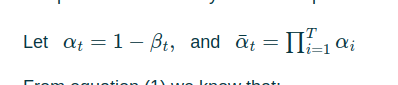
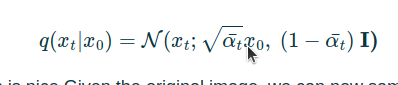

In [6]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
seed = 1234
np.random.seed(seed)
plt.style.use("ggplot")


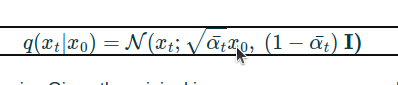

In [7]:

def forward_process_ddpms_v2(orig_img, alpha_bar, t):
    """Implements the efficient forward process of a DDPM model.
    
    Args:
        orig_img: Image at timestep t=0
        alpha_bar: The reparameterized version of beta
        t: Current timestep
    Returns:
        Image obtained at current timestep
    """
    
    # 1. Obtain beta_t. Reshape it to have the same number of
    # dimensions as our image array
    alpha_bar_t = alpha_bar[t].reshape(-1, 1, 1)
    
    # 2. Calculate mean and variance
    mu = np.sqrt(alpha_bar_t) * orig_img
    sigma = np.sqrt(1.0 - alpha_bar_t)
    
    # 3. Obtain image at timestep t
    img_t = mu + sigma * np.random.randn(*orig_img.shape)
    return img_t

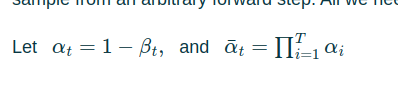

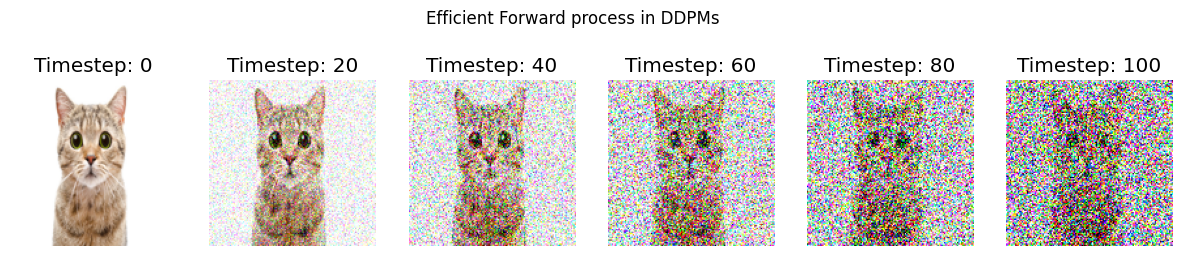

In [8]:

timesteps = 500
beta_start = 0.0001
beta_end = 0.05
beta = np.linspace(beta_start, beta_end, num=timesteps, dtype=np.float32)



# 1. Define alpha and alpha_bar
alpha = 1.0 - beta
alpha_bar = np.cumprod(alpha)

# 1. Load image using PIL (or any other library that you prefer)
img = Image.open("../images/cat.jpg")

# 2. Resize the image to desired dimensions
IMG_SIZE = (128, 128)
img = img.resize(size=IMG_SIZE)

processed_images = [img] # Image at 0th step
orig_img = np.asarray(img.copy(), dtype=np.float32) / 255.


# 2. Run the forward pass for specific timesteps
# We will use the timesteps we used in previous visualizations
specific_timesteps = [19, 39, 59, 79, 99]
for step in specific_timesteps:
    img_t = forward_process_ddpms_v2(orig_img, alpha_bar, step)
    img_t = (img_t.clip(0, 1) * 255.0).astype(np.uint8)
    processed_images.append(img_t)

    
# 3. Plot and see samples at different timesteps
_, ax = plt.subplots(1, len(processed_images), figsize=(15, 6))

for i, sample in enumerate(processed_images):
    ax[i].imshow(sample)
    ax[i].set_title(f"Timestep: {i*20}")
    ax[i].axis("off")
    ax[i].grid(False)

plt.suptitle("Efficient Forward process in DDPMs", y=0.75)
plt.axis("off")
plt.savefig("../results/efficient_forward_process.png",
            pad_inches=0,
            bbox_inches='tight'
           )
plt.show()
plt.close()